# Box Plots

This notebook is going to be a brief tutorial on creating histogram boxplots. A lot of our steps are similar to the ones from other notebooks, so there will not be full explanations for each step. Ask if you have questions.

### Installation

In [1]:
#!pip install bokeh
#!pip install pandas

### Imports

In [2]:
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt

from bokeh.charts import BoxPlot, output_file, show
from bokeh.sampledata.autompg import autompg as df

### Reading CSV

In [3]:
years = Table().read_table('cultural_repatriation_medici_scandal_years2.csv')
years

EK rep,Dallas rep,Cleveland rep,MFA rep,Getty rep,Princeton Rep,Royal rep,MET rep,Princeton rep
34,14,31,27,19,12,22,23,18
7,14,18,14,18,12,17,18,16
26,16,20,27,19,12,20,nan,12
24,13,22,17,nan,18,nan,nan,15
22,nan,22,0,nan,nan,nan,nan,12
25,nan,22,28,nan,nan,nan,nan,9
24,nan,22,27,nan,nan,nan,nan,14
22,nan,22,29,nan,nan,nan,nan,nan
nan,nan,21,15,nan,nan,nan,nan,nan
nan,nan,33,18,nan,nan,nan,nan,nan


In [4]:
start_and_end = Table().read_table('cultural_repatriation_medici_scandal_years.csv')
start_and_end

year_bought,repatriation,repatriation_year
1972,EK rep,2006
1999,EK rep,2006
1980,EK rep,2006
1982,EK rep,2006
1984,EK rep,2006
1981,EK rep,2006
1982,EK rep,2006
1984,EK rep,2006
1998,2012 Dallas rep,2012
1998,2012 Dallas rep,2012


### Reformatting years

In [5]:
rebuilt_table = Table(['Rep', 'Years'])

for col in years.labels:
    for value in years[col]:
        if not np.isnan(value):
            rebuilt_table.append([col, value])

rebuilt_df = rebuilt_table.to_df()
rebuilt_df

,Rep,Years
0,EK rep,34.0
1,EK rep,7.0
2,EK rep,26.0
3,EK rep,24.0
4,EK rep,22.0
5,EK rep,25.0
6,EK rep,24.0
7,EK rep,22.0
8,Dallas rep,14.0
9,Dallas rep,14.0


### Making the Box Plot

To actually make the historgram box-plot, we are going to use the BoxPlot function from the Bokeh library. The specfic required inputs for the function can be found on the Bokeh site. Take a look at the inputs that we put into this box-plot and try to understand what each one represents/does.

In [6]:
p = BoxPlot(rebuilt_df, values='Years', label='Rep', background_fill_color="#EFE8E2"
            ,color='Rep',title="Rep Value Ranges", legend=False)
show(p)

### Another Way to Visualize Distributions

For this visualization, we will be using the seaborn Python library (data visualization library based on Python's matplotlib library). Documentation for the library can be found at : https://seaborn.pydata.org/. In the documentation, you will find the functions and inputs required to create the following types of visualizations (swarmplots, violinplots, etc.)

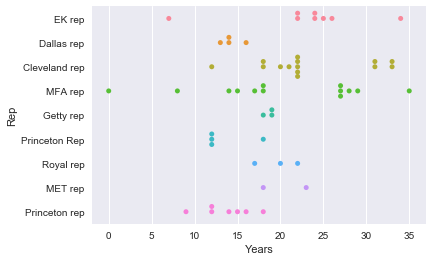

In [8]:
import seaborn as sns
%matplotlib inline

sns.swarmplot(x="Years", y="Rep", data=rebuilt_df)

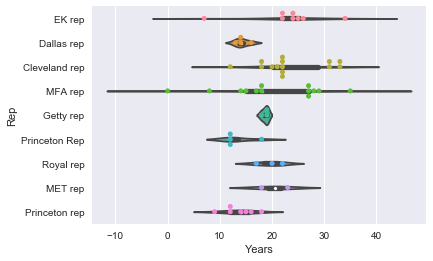

In [9]:
sns.violinplot(x="Years", y="Rep", data=rebuilt_df)
sns.swarmplot(x="Years", y="Rep", data=rebuilt_df)

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


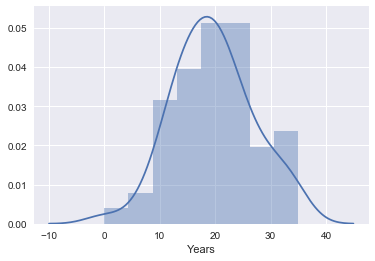

In [10]:
sns.distplot(rebuilt_df['Years'])

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


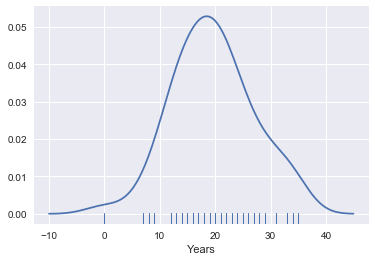

In [11]:
sns.distplot(rebuilt_df['Years'], rug=True, hist=False)

## Extra

The code for this extra visualization is difficult to follow, so we don't reccomend reading through it thoroughly. However, if you like this type of visualization, speak with us and we can help you rewrite this code for your own data. 

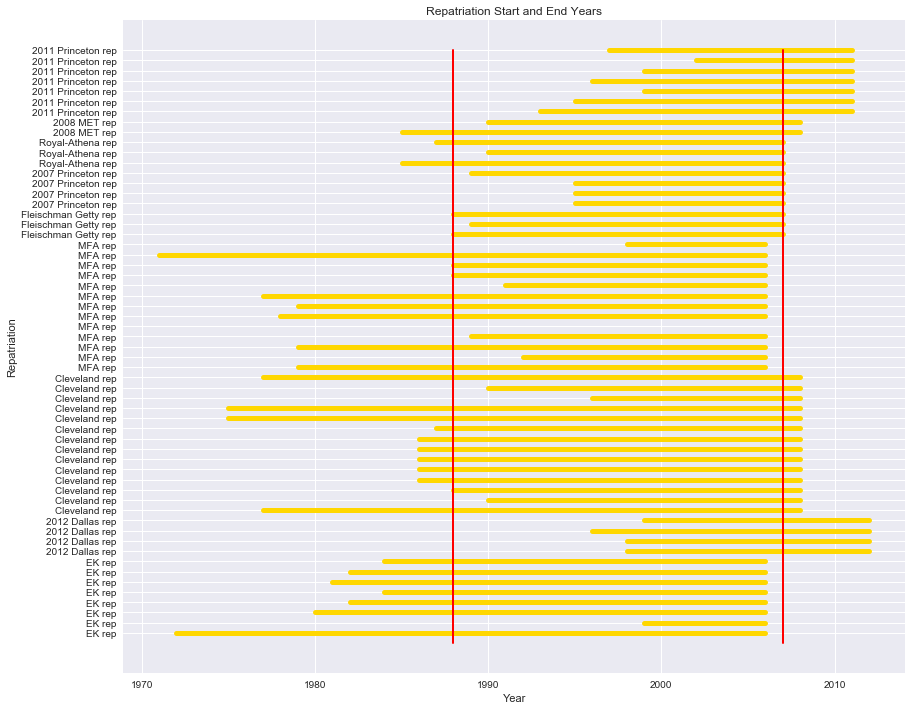

In [12]:
# flipping start_and_end on its side to make it easier to plot
replication_number = np.ndarray.astype(np.arange(1, start_and_end.num_rows+1), str)
sideways_table = Table(replication_number).with_rows(make_array(start_and_end.column('year_bought'), start_and_end.column('repatriation_year')))

# we will plot these on the graph
median_start_year = np.median(start_and_end.column('year_bought'))
median_end_year = np.median(start_and_end.column('repatriation_year'))

# changing the size of our graph
plt.figure(figsize=(14,12))

# plotting each rep's line, iterating through each column of sideways_table
for i in np.arange(0,start_and_end.num_rows):
    ends = sideways_table.column(i)
    plt.plot(ends, make_array(i+1, i+1), color='gold', lw=5)

# plotting the median values
plt.plot(make_array(median_start_year, median_start_year), make_array(0, start_and_end.num_rows), color='red', lw=2)
plt.plot(make_array(median_end_year, median_end_year), make_array(0, start_and_end.num_rows), color='red', lw=2)

# changing the numerical y-ticks to be the rep that the number represents
plt.yticks(np.arange(1,start_and_end.num_rows+1) , start_and_end.column('repatriation'))

plt.xlabel('Year')
plt.ylabel('Repatriation')
plt.title('Repatriation Start and End Years')